In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.model import *


In [2]:
cards = pd.read_json('data/cards.json')
parent_dir = '/home/jovyan/data/art/'
target_size = (224, 224)
batch_size = 8


In [3]:
# cards = cards[cards['set'].isin(['m10'])]
cards = cards[cards.set_type == 'core']

In [4]:
train_df, test_df = prepare_data(cards, test_size=0.2)

train_gen, valid_gen, test_gen = flow_to_generators(
    train_df, test_df,
    parent_dir=parent_dir,
    target_size=target_size,
    batch_size=batch_size
)

Found 1533 validated image filenames belonging to 6 classes.
Found 383 validated image filenames belonging to 6 classes.
Found 481 validated image filenames.


/opt/conda/lib/python3.8/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 12 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 12 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 2 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


In [5]:
input_shape = target_size + (3,)
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
history = model.fit(
    train_gen,
    validation_data=train_gen,
    steps_per_epoch=train_gen.n//train_gen.batch_size,
    validation_steps=valid_gen.n//valid_gen.batch_size,
    epochs=10
)

Epoch 1/20
191/191 [==============================] - 66s 343ms/step - loss: 2.4965 - accuracy: 0.2456 - val_loss: 1.6668 - val_accuracy: 0.3511
Epoch 2/20
191/191 [==============================] - 65s 339ms/step - loss: 1.6219 - accuracy: 0.3612 - val_loss: 1.6375 - val_accuracy: 0.3590
Epoch 3/20
191/191 [==============================] - 65s 339ms/step - loss: 1.5818 - accuracy: 0.3796 - val_loss: 1.5966 - val_accuracy: 0.3617
Epoch 4/20
191/191 [==============================] - 66s 344ms/step - loss: 1.5727 - accuracy: 0.3750 - val_loss: 1.5553 - val_accuracy: 0.3511
Epoch 5/20
191/191 [==============================] - 65s 341ms/step - loss: 1.6034 - accuracy: 0.3689 - val_loss: 1.5017 - val_accuracy: 0.4441
Epoch 6/20
191/191 [==============================] - 66s 343ms/step - loss: 1.5194 - accuracy: 0.4262 - val_loss: 1.5852 - val_accuracy: 0.3590
Epoch 7/20
191/191 [==============================] - 65s 342ms/step - loss: 1.5277 - accuracy: 0.3962 - val_loss: 1.5481 - val_ac

In [7]:
score = model.evaluate(valid_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


48/48 [==============================] - 7s 141ms/step - loss: 1.7285 - accuracy: 0.4178
Test loss: 1.728529930114746
Test accuracy: 0.41775456070899963


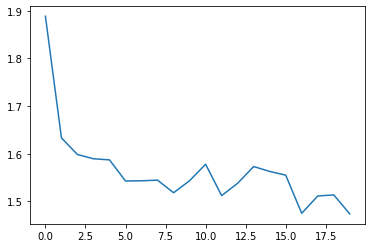

In [8]:
fig, ax = plt.subplots()
ax.plot(history.epoch, history.history['loss'])